In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
path = "data/covid_19_clean_complete.csv"
df = pd.read_csv(path)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
df_Colombia = df[df['Country/Region'] == 'Colombia']
df_Colombia

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
81,NaN,Colombia,4.5709,-74.2973,2020-01-22,0,0,0,0,Americas
342,NaN,Colombia,4.5709,-74.2973,2020-01-23,0,0,0,0,Americas
603,NaN,Colombia,4.5709,-74.2973,2020-01-24,0,0,0,0,Americas
864,NaN,Colombia,4.5709,-74.2973,2020-01-25,0,0,0,0,Americas
1125,NaN,Colombia,4.5709,-74.2973,2020-01-26,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
47844,NaN,Colombia,4.5709,-74.2973,2020-07-23,226373,7688,107951,110734,Americas
48105,NaN,Colombia,4.5709,-74.2973,2020-07-24,233541,7975,113864,111702,Americas
48366,NaN,Colombia,4.5709,-74.2973,2020-07-25,240795,8269,119667,112859,Americas
48627,NaN,Colombia,4.5709,-74.2973,2020-07-26,240795,8269,119667,112859,Americas


In [4]:
df_Colombia.isnull().sum()

Province/State    188
Country/Region      0
Lat                 0
Long                0
Date                0
Confirmed           0
Deaths              0
Recovered           0
Active              0
WHO Region          0
dtype: int64

In [5]:
df_Colombia = df_Colombia.drop('Province/State', axis=1)
df_Colombia.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [6]:
df_Colombia

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
81,Colombia,4.5709,-74.2973,2020-01-22,0,0,0,0,Americas
342,Colombia,4.5709,-74.2973,2020-01-23,0,0,0,0,Americas
603,Colombia,4.5709,-74.2973,2020-01-24,0,0,0,0,Americas
864,Colombia,4.5709,-74.2973,2020-01-25,0,0,0,0,Americas
1125,Colombia,4.5709,-74.2973,2020-01-26,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...
47844,Colombia,4.5709,-74.2973,2020-07-23,226373,7688,107951,110734,Americas
48105,Colombia,4.5709,-74.2973,2020-07-24,233541,7975,113864,111702,Americas
48366,Colombia,4.5709,-74.2973,2020-07-25,240795,8269,119667,112859,Americas
48627,Colombia,4.5709,-74.2973,2020-07-26,240795,8269,119667,112859,Americas


In [7]:
dates = df_Colombia[["Date", "Confirmed", "Deaths", "Recovered", "Active"]].copy()
dates['Date'] = pd.to_datetime(dates['Date'])
dates = dates.set_index(dates['Date']).drop("Date",axis=1).resample('D').sum()
dates

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2020-07-23,226373,7688,107951,110734
2020-07-24,233541,7975,113864,111702
2020-07-25,240795,8269,119667,112859


In [8]:
dates.describe()

,Confirmed,Deaths,Recovered,Active
count,188.000000,188.000000,188.000000,188.000000
mean,36665.542553,1258.111702,15020.271277,20387.159574
std,61000.321766,2091.025748,27977.236028,31239.401632
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,5011.500000,229.000000,1035.000000,3747.500000
75%,44064.500000,1446.750000,16766.000000,25851.750000
max,257101.000000,8777.000000,131161.000000,117163.000000


In [9]:
def show_linePlot(df, y_type = "N.N", title = "", palette = "deep"):
    colors = sns.color_palette(palette)
    color = random.choice(colors)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    sns.lineplot(df, x=df.index, y=y_type, color=color)    
    plt.grid(True)
    plt.show()


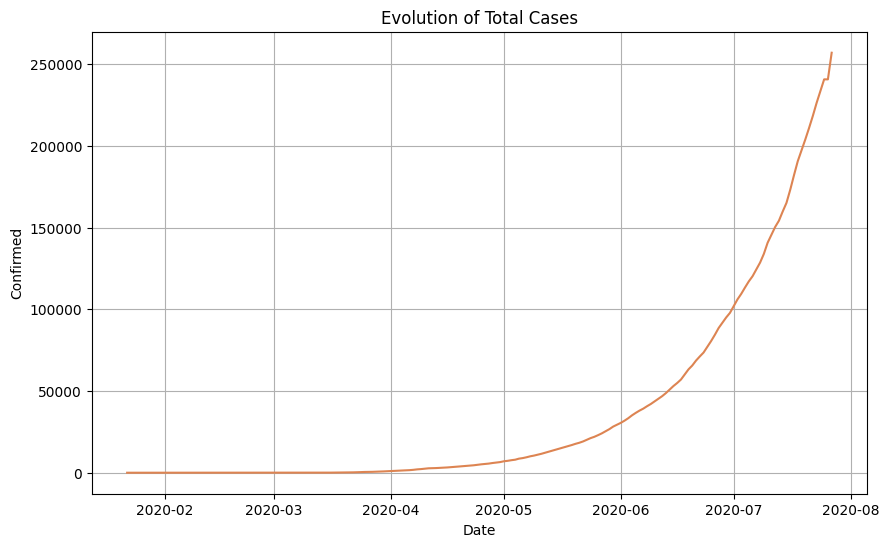

In [10]:
show_linePlot(dates, "Confirmed", "Evolution of Total Cases")

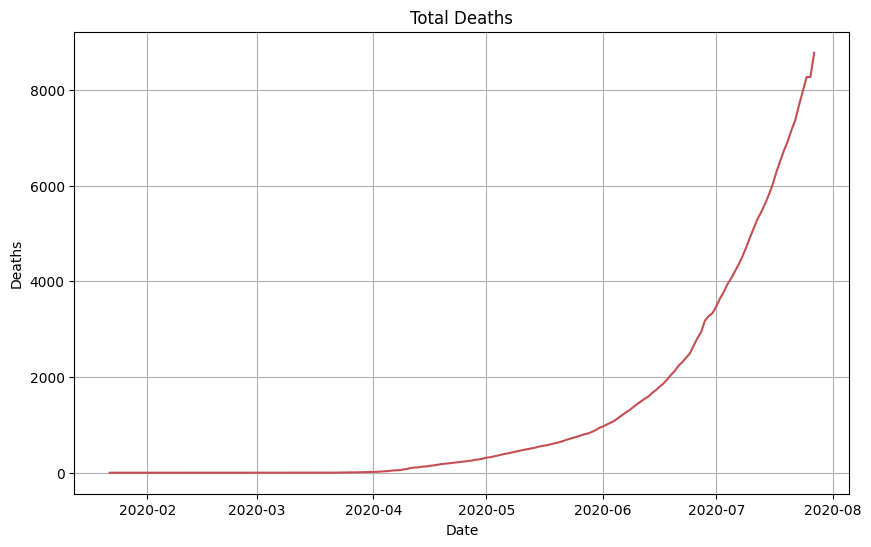

In [11]:
show_linePlot(dates, "Deaths", "Total Deaths")

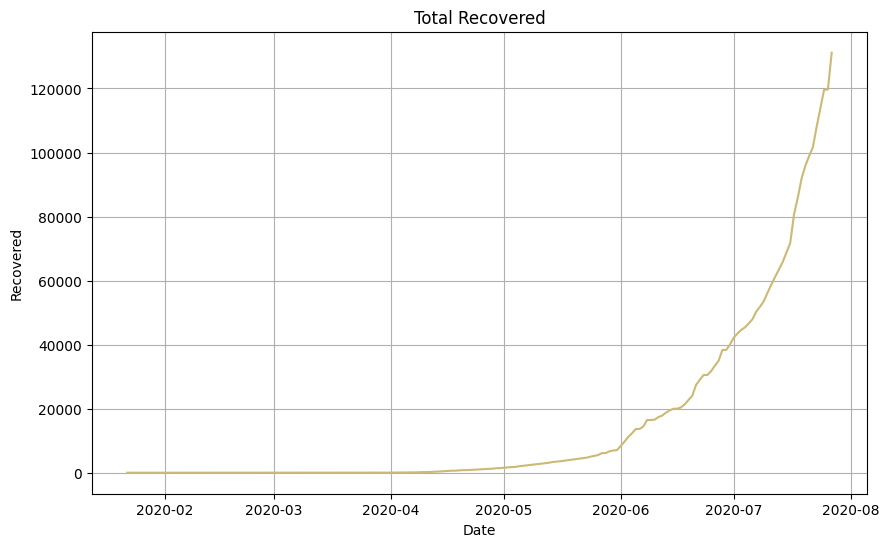

In [12]:
show_linePlot(dates, "Recovered", "Total Recovered")

## Growth Rate
Using this formula:

$$
\text{Growth Rate} = \frac{\text{New Value} - \text{Old Value}}{\text{Old Value}}
$$

In [13]:
dates['Growth Rate'] = (dates["Confirmed"] - dates["Confirmed"].shift(1)) / dates["Confirmed"].shift(1) * 100

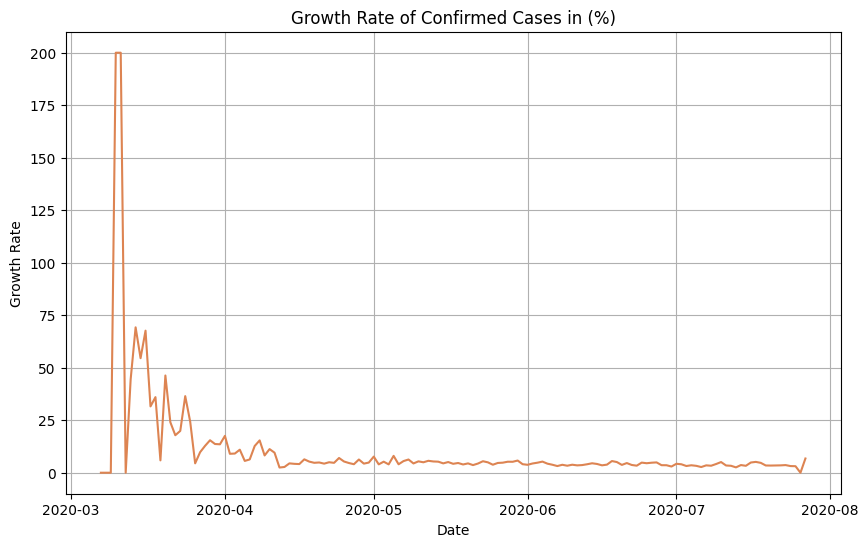

In [14]:
show_linePlot(dates, "Growth Rate", "Growth Rate of Confirmed Cases in (%)")